In [54]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare, shapiro, ttest_ind, mannwhitneyu, f_oneway, levene, bootstrap
import seaborn as sns
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt

In [27]:
df = pd.read_csv('Downloads/5_task_2.csv')

In [28]:
df.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [8]:
x = shapiro(df[df.group == 'test'].events)
y = shapiro(df[df.group == 'control'].events)

/Users/sergejknol/miniconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 50000.
  res = hypotest_fun_out(*samples, **kwds)


In [15]:
a = df[df.group == 'test'].events
b = df[df.group == 'control'].events
c = df.events.sample(50000)

In [10]:
ttest_ind(a, b)

TtestResult(statistic=np.float64(119.02193644346396), pvalue=np.float64(0.0), df=np.float64(99998.0))

In [11]:
mannwhitneyu(a,b)

MannwhitneyuResult(statistic=np.float64(2023846314.0), pvalue=np.float64(0.0))

In [20]:
f_oneway(a,b,c)

F_onewayResult(statistic=np.float64(6785.6004340940935), pvalue=np.float64(0.0))

In [27]:
model = smf.ols(formula = 'events ~ group', data=df).fit()
anova_lm(model)

NameError: name 'anova_lm' is not defined

In [30]:
pairwise_tukeyhsd(df.events, df.group)

In [12]:
cars = pd.read_csv('https://stepik.org/media/attachments/lesson/387691/cars.csv')
cars = cars.rename(columns={'CarName':'model'})

In [13]:
cars['model'] = cars.model.str.split(' ', expand=True)[0]

In [15]:
cars_dm = pd.get_dummies(data=cars, drop_first=True)

In [16]:
a = cars[cars.model == 'alfa-romero'].price
b = cars[cars.model == 'volvo'].price
c = cars[cars.model == 'audi'].price

In [64]:
f_oneway(a,b,c)

F_onewayResult(statistic=np.float64(0.8238564918394298), pvalue=np.float64(0.45461577177737755))

In [68]:
model = smf.ols('price ~ horsepower', data=cars).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           1.48e-48
Time:                        00:12:01   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.0

In [19]:
results = smf.ols('price ~ horsepower + model + carlength', cars).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     70.44
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           2.18e-81
Time:                        00:24:18   Log-Likelihood:                -1872.2
No. Observations:                 205   AIC:                             3804.
Df Residuals:                     175   BIC:                             3904.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.873e+04 

In [17]:
cars.columns

Index(['car_ID', 'symboling', 'model', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [36]:
medians = []

for i in range(10000):
    #симулируем выборку
    sample_data = cars.price.sample(frac=1, replace=True)
    
    #считаем показатель - в данном случае медиану
    sample_median = sample_data.median()

    #добавляем результат в список
    medians.append(sample_median)

In [43]:
aov_df = pd.read_csv('Downloads/categorical_analysis/one_promo_df.csv')

In [56]:
aov_df = pd.get_dummies(aov_df, drop_first=True)

In [63]:
aov_df['promo_type_no_promo'] = ~aov_df.promo_type_no_promo

In [64]:
model = smf.ols('order_value ~ promo_type_no_promo', aov_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            order_value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.166
Date:                Mon, 16 Sep 2024   Prob (F-statistic):              0.280
Time:                        09:55:41   Log-Likelihood:            -3.5255e+05
No. Observations:               99969   AIC:                         7.051e+05
Df Residuals:                   99967   BIC:                         7.051e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [64]:
df = pd.read_csv('https://stepik.org/api/attempts/1218429294/file')

HTTPError: HTTP Error 403: Forbidden

In [51]:
df

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


In [49]:
df.groupby('group').species.count()

group
brown    6
green    3
red      1
Name: species, dtype: int64

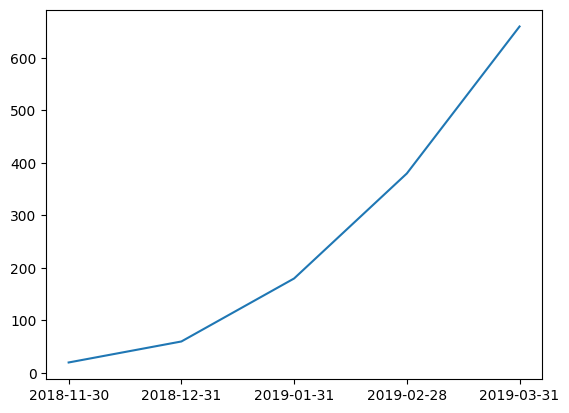

In [63]:
plt.plot(df.index, df.income)